# Проектная работа по проверке гипотез для увеличения выручки интернет-магазина и анализу результатов А/В теста

В нашем распоряжении есть файл с данными оценок параметров Reach, Impact, Confidence, Effort нескольких гипотез для увеличения выручки интернет-магазина. Нам нужно приоритезировать гипотезы и сделать выводы.

Также нам предстоит ответить на вопрос о необходимости продолжения А/В теста или его остановки и определения победы одной из групп или отсутствия существенных различий между ними. В качестве исследуемых параметров мы рассмотрим:
- кумулятивную выручку по группам
- кумулятивный средний чек по группам  и его изменение в динамике
- кумулятивное среднее количество заказов на посетителя по группамn и его изменение в динамике
- количество заказов по пользователям и стоимости заказов, среднее количество заказов на пользователя


In [7]:
# импорт необходимых библиотек и функций

import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

# Установка максимальной ширины для отображения содержимого колонки
pd.set_option('display.max_colwidth', None)

# Установка максимального количества отображаемых колонок
pd.set_option('display.max_columns', None)


def line():
    print('------------------------------------------------------------------')


## Приоритезация гипотез

- Загрузим файл с данными о гипотезах и посмотрим на его структуру 


In [8]:
hyp_data = pd.read_csv('hypothesis.csv')
display(hyp_data.head(10))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


У нас есть 9 гипотез для увеличения выручки с оценками от 1 до 10 по критериям Reach (охват), Impact (влияние), Confidence (уверенность в оценках), Efforts (необходимые усилия для реализации). 

- Используем методы ICE & RICE и расставим приоритеты для гипотез 

### Приоритезация гипотез методом ICE

In [9]:
hyp_data['ICE'] = round((hyp_data['Impact'] * hyp_data['Confidence']) / hyp_data['Efforts'], 2)

display(hyp_data.sort_values(by='ICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


### Приоритезация гипотез методом RICE

In [10]:
hyp_data['RICE'] = round((hyp_data['Reach'] * hyp_data['Impact'] * hyp_data['Confidence']) / hyp_data['Efforts'], 2)

display(hyp_data.sort_values(by='RICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


**Мы видим, что два метода оценки дают нам отличие в приоритетах, которые получают гипотезы. Это связано с тем, что в RICE появляется параметр `охвата аудитории Reach`**

Если ICE на 1е место ставил гипотезу №8, то с учетом охвата Reach она опустилась на 5е место.

Некоторые проекты или продукты могут иметь ограниченный охват, но высокий потенциал влияния на пользователей или бизнес, либо реализация этих проектов может иметь стратегическое значение, либо же мы хотим использовать максимально простой метод подсчета, поскольку не уверены в точности наших оценок. В таких случаях ICE может быть более подходящим инструментом для приоритизации.

В остальном - `RICE` выглядит более подходящим для наших задач - **"увеличение выручки инернет-магазина"**, поскольку больше продаж проще всего достичь с большим количеством покупателей, а это как раз про охват.

Таким образом, гипотезы по убыванию приоритета мы располагаем так:


In [11]:
display(hyp_data.sort_values(by='RICE', ascending=False)[['Hypothesis']])

,Hypothesis
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
8,"Запустить акцию, дающую скидку на товар в день рождения"
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
1,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


## Анализ А/В теста

- Загрузим файлы с данными о тесте и посмотрим на его структуру 


In [12]:
orders = pd.read_csv('orders.csv')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
    
visitors = pd.read_csv('visitors.csv')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
    
display(orders.sample(10))
print(orders.info())
line()
display(visitors.sample(10))
print(visitors.info())

,transactionId,visitorId,date,revenue,group
176,1791477067,3261022559,2019-08-02,995,B
1098,1092419081,3062433592,2019-08-12,16920,A
1188,1692103379,1022829655,2019-08-14,112,A
684,3964942202,358944393,2019-08-29,42740,A
392,3796325351,4281247801,2019-08-25,2640,B
320,1652782757,2763027084,2019-08-19,1460,B
878,3315359627,1831956319,2019-08-05,90,A
849,373945924,3785537730,2019-08-05,2290,B
240,2086338800,3028866828,2019-08-02,110,A
362,1552043751,109615108,2019-08-06,2190,A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None
------------------------------------------------------------------


,date,group,visitors
57,2019-08-27,B,720
0,2019-08-01,A,719
15,2019-08-16,A,361
56,2019-08-26,B,676
37,2019-08-07,B,709
30,2019-08-31,A,699
51,2019-08-21,B,656
3,2019-08-04,A,717
20,2019-08-21,A,646
19,2019-08-20,A,575


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


**Файл /datasets/orders.csv содержит данные о заказах.**

`transactionId` — идентификатор заказа;

`visitorId` — идентификатор пользователя, совершившего заказ;

`date` — дата, когда был совершён заказ;

`revenue` — выручка заказа;

`group` — группа A/B-теста, в которую попал заказ.


**Файл /datasets/visitors.csv - информация о количестве визитов пользователей из каждой группы теста**


`date` — дата;

`group` — группа A/B-теста;

`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

---------------------------------------------

Пропусков в данных нет

In [13]:
print('Статистика данных для А/В теста:')
line()
print('Групп в А/В тесте:', orders['group'].unique())
print('Дата начала и окончания теста:', orders['date'].min().date(), '-', orders['date'].max().date())
line()
print('Количество уникальных покупателей в группе: А:', orders.query('group == "A"')['visitorId'].nunique())
print('Количество уникальных покупателей в группе: B:', orders.query('group == "B"')['visitorId'].nunique())
line()
print('Количество посетителей в группе: А:', visitors.query('group == "A"')['visitors'].sum())
print('Количество посетителей в группе: B:', visitors.query('group == "B"')['visitors'].sum())



Статистика данных для А/В теста:
------------------------------------------------------------------
Групп в А/В тесте: ['B' 'A']
Дата начала и окончания теста: 2019-08-01 - 2019-08-31
------------------------------------------------------------------
Количество уникальных покупателей в группе: А: 503
Количество уникальных покупателей в группе: B: 586
------------------------------------------------------------------
Количество посетителей в группе: А: 18736
Количество посетителей в группе: B: 18916


- Из предварительного анализа данных мы можем уже заметить, что при схожей посещаемости в группах А и В, покупателей в группе В существенно больше. 

### Построим график кумулятивной выручки по группам

- подготовим таблицу с агрегированными кумулятивными показателями

In [14]:
# создаем список пар дата - группа
dates_groups = orders[['date','group']].drop_duplicates().sort_values(by=['date', 'group']).reset_index(drop=True)

# считаем кумулятивную выручку, количество уникальных клиентов и заказов
orders_aggregated =  (dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                                       orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)
                     .sort_values(by=['date','group']))

# считаем кумулятивную количество посетителей
visitors_aggregated = (dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                                          visitors['group'] == x['group'])]\
                                        .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group']))

# объединяем кумулятивные данные в одной таблице
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulative_data.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


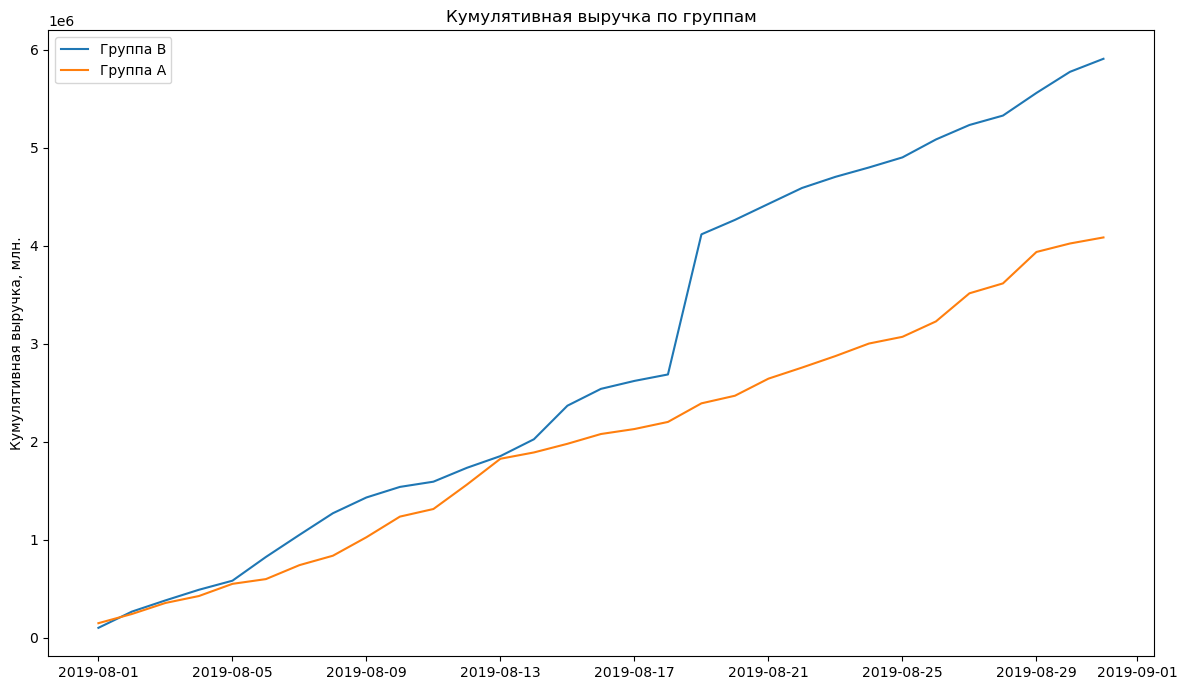

In [15]:
# выбираем данные отдельно по каждой из групп
cumulative_A = cumulative_data.loc[cumulative_data['group']=='A'][['date','revenue','orders']]
cumulative_B = cumulative_data.loc[cumulative_data['group']=='B'][['date','revenue','orders']]

plt.figure(figsize=(12,7))
plt.plot(cumulative_B['date'], cumulative_B['revenue'], label='Группа B')
plt.plot(cumulative_A['date'], cumulative_A['revenue'], label='Группа A')

plt.ylabel('Кумулятивная выручка, млн.')
plt.title('Кумулятивная выручка по группам')
plt.legend()

plt.tight_layout()

plt.show()

На графике виден скачкообразный рост кумулятивной выручки по группе В в районе 19 августа, в то время, как динамика прироста выручки обеих групп похожа. Это может говорить о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. После 19 августа рост куммулятивной выручки группы В аналогичен росту группы А.

Кроме того, на графике заметен более активный рост выручки группы В в районе 6 и 14 августа, в то время, как выручка группы А очень стабильна в своем приросте.

### Построим график кумулятивного среднего чека по группам

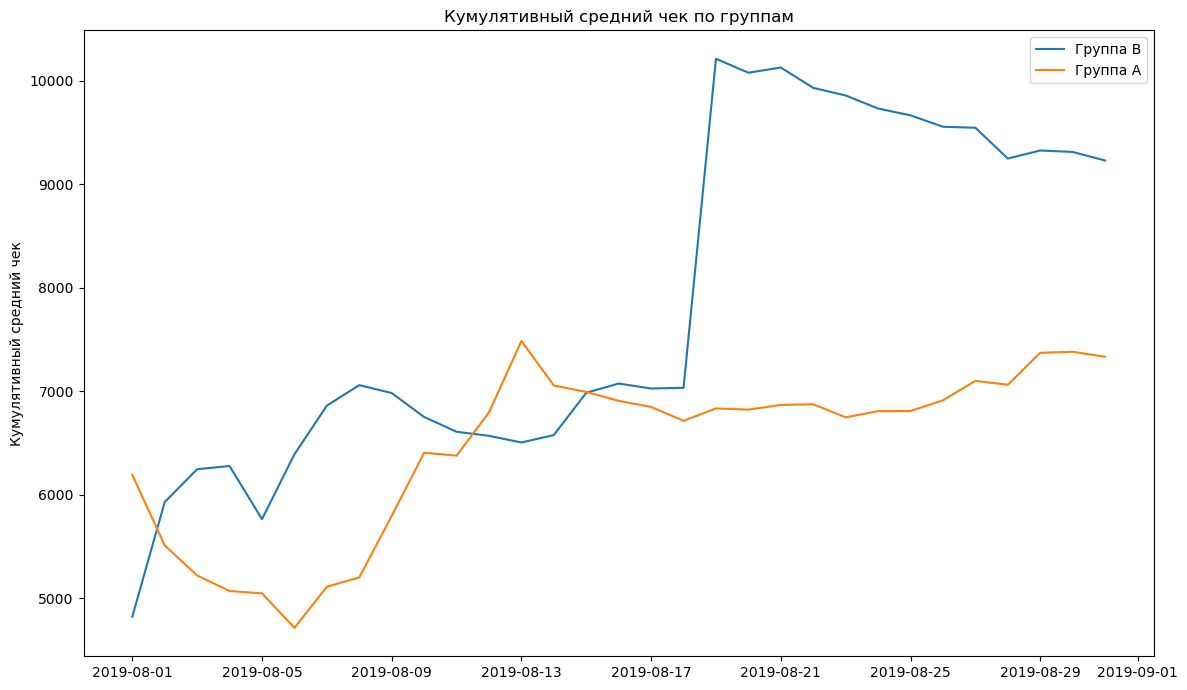

In [16]:
plt.figure(figsize=(12,7))

plt.plot(cumulative_B['date'],(cumulative_B['revenue'] / cumulative_B['orders']), label='Группа В')
plt.plot(cumulative_A['date'],(cumulative_A['revenue'] / cumulative_A['orders']), label='Группа А')


plt.ylabel('Кумулятивный средний чек')
plt.title('Кумулятивный средний чек по группам')
plt.legend()

plt.tight_layout()

plt.show()

Кумулятивный средний чек у группы В на протяжении первой недели теста рос (с 5000 до 7000), а у группы А, напротив, падал с 6000 до 5000. В районе 12 августа уровень среднего чека у обеих групп выровнялся и показывал смешанную динамику, а затем резко вырос у группы В с 7000 до 10000 в районе 19 августа, что говорит о аномально дорогих заказах или уменьшении количества покупателей. После 19 августа кумулятивный средний чек группы В постепенно снижается, в то время, как чек группы А растет.

**Проверим гипотезу об изменении количества покупателей**

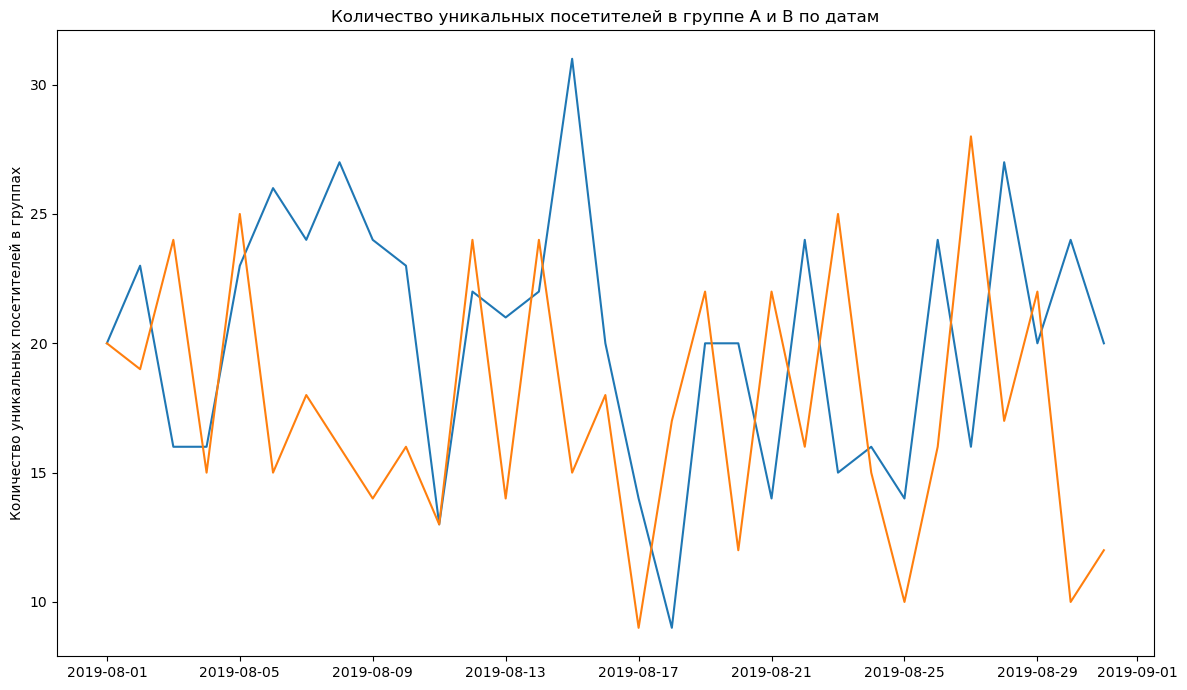

In [17]:
visitors_a = ( 
    orders.query('group == "A"')
    .groupby(['date','group'])
    .agg({'visitorId':'nunique','revenue':'sum'})
    .sort_values(by='date')
)
visitors_b = (
    orders.query('group == "B"')
    .groupby(['date','group'])
    .agg({'visitorId':'nunique','revenue':'sum'})
    .sort_values(by='date')
)

all_visitors = visitors_a.merge(visitors_b, left_on='date', right_on='date', suffixes=['A','B']).reset_index()

plt.figure(figsize=(12,7))

plt.plot(all_visitors['date'], all_visitors['visitorIdB'], label='Visitors B')
plt.plot(all_visitors['date'], all_visitors['visitorIdA'], label='Visitors A')

plt.ylabel('Количество уникальных посетителей в группах')
plt.title('Количество уникальных посетителей в группе A и В по датам')

plt.tight_layout()
plt.show()

 - из графика можно заключить, что количество уникальных ежедневных покупателей в группах А и В в интересующем нас промежутке времени (18-20 августа) примерно одинаково и показывает одинаковую динамику по дням. Следовательно, увеличение среднего чека связано с более дорогой покупкой

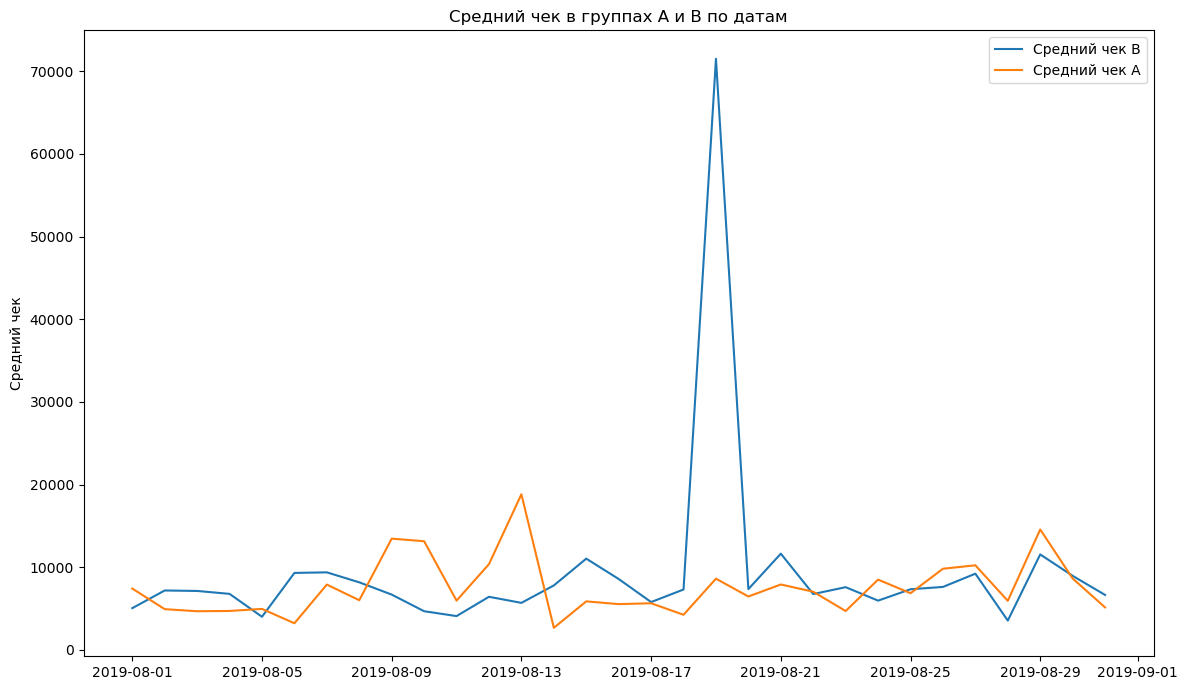

In [18]:
plt.figure(figsize=(12,7))

plt.plot(all_visitors['date'], all_visitors['revenueB'] / all_visitors['visitorIdB'], label='Средний чек B')
plt.plot(all_visitors['date'], all_visitors['revenueA'] / all_visitors['visitorIdA'], label='Средний чек A')

plt.ylabel('Средний чек')
plt.title('Средний чек в группах A и В по датам')
plt.legend()

plt.tight_layout()
plt.show()

 - Становится очевидно, что выброс среднего чека группы В 19 августа связан с дорогой покупкой. После 19 августа показатели среднего чека возвращаются к значениям, сравнымым с группой А

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

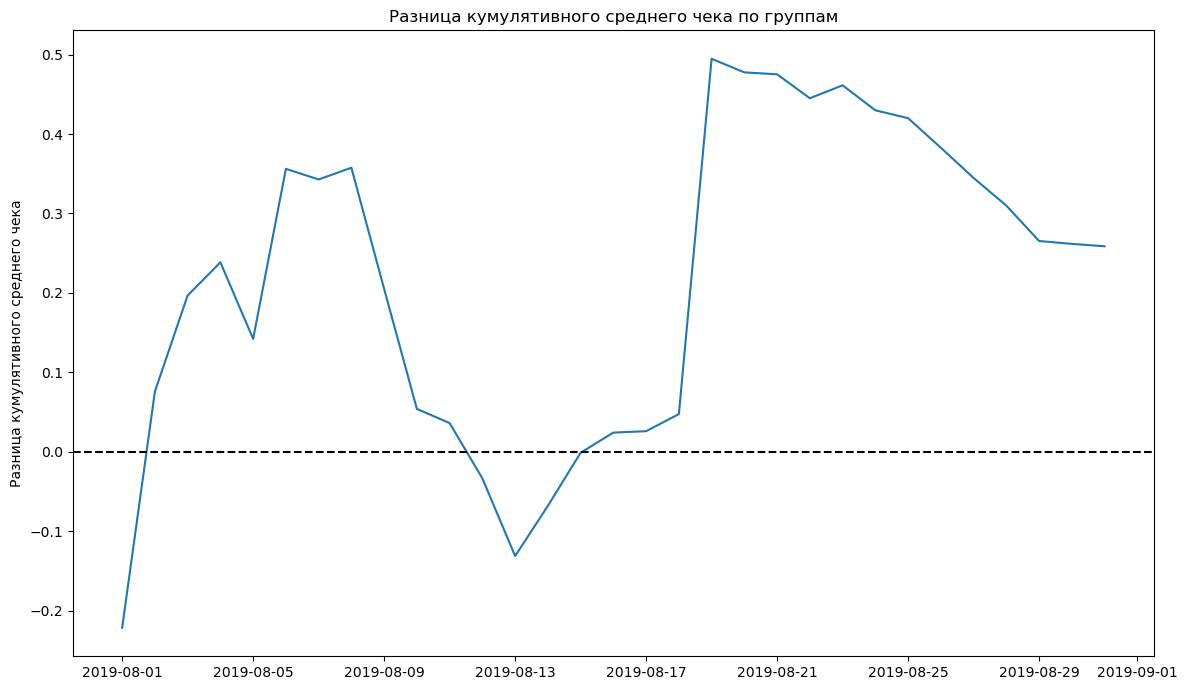

In [19]:
merged_data = cumulative_A.merge(cumulative_B, left_on = 'date', right_on = 'date', suffixes = ['A', 'B'])

plt.figure(figsize=(12,7))
plt.plot(merged_data['date'],\
         (merged_data['revenueB']/merged_data['ordersB'])\
         /(merged_data['revenueA']/merged_data['ordersA'])-1)

# добавляем линию на 0
plt.axhline(y=0, color='black', linestyle='--') 

plt.ylabel('Разница кумулятивного среднего чека')
plt.title('Разница кумулятивного среднего чека по группам')
plt.tight_layout()

plt.show()

 - на графике мы наблюдаем, что средний чек группы В превышает средний чек группы А практически на всем временном промежутке теста, но после дорогого заказа 19 августа, средний чек группы В постепенно снижается, а группы А - растет.

### Построим график кумулятивного среднего количества заказов на посетителя по группам

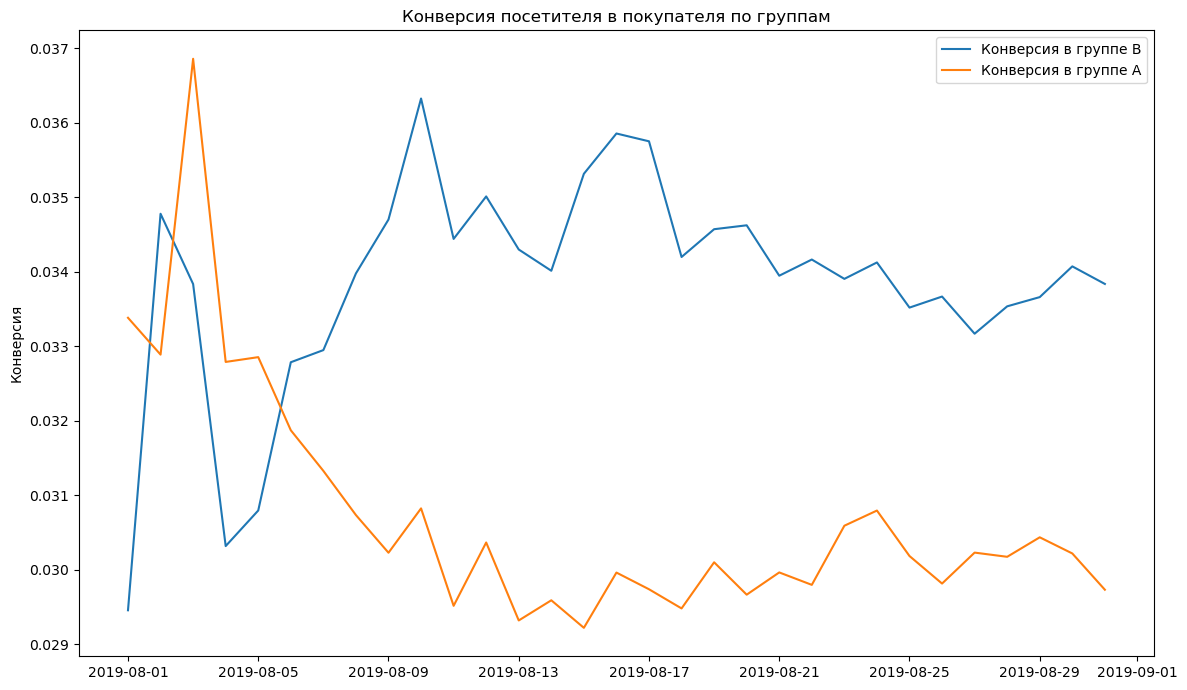

In [20]:
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

cumulative_data_A = cumulative_data[cumulative_data['group']=='A']

cumulative_data_B = cumulative_data[cumulative_data['group']=='B']

plt.figure(figsize=(12,7))

plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='Конверсия в группе B')
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='Конверсия в группе A')

plt.legend()

plt.ylabel('Конверсия')
plt.title('Конверсия посетителя в покупателя по группам')
plt.tight_layout()

plt.show()

- вот тут интересно - после 6 августа конверсия посетителей из группы В существенно выше, чем в группе А, что говорит о том, что клиенты из группы В чаще совершают заказы.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A


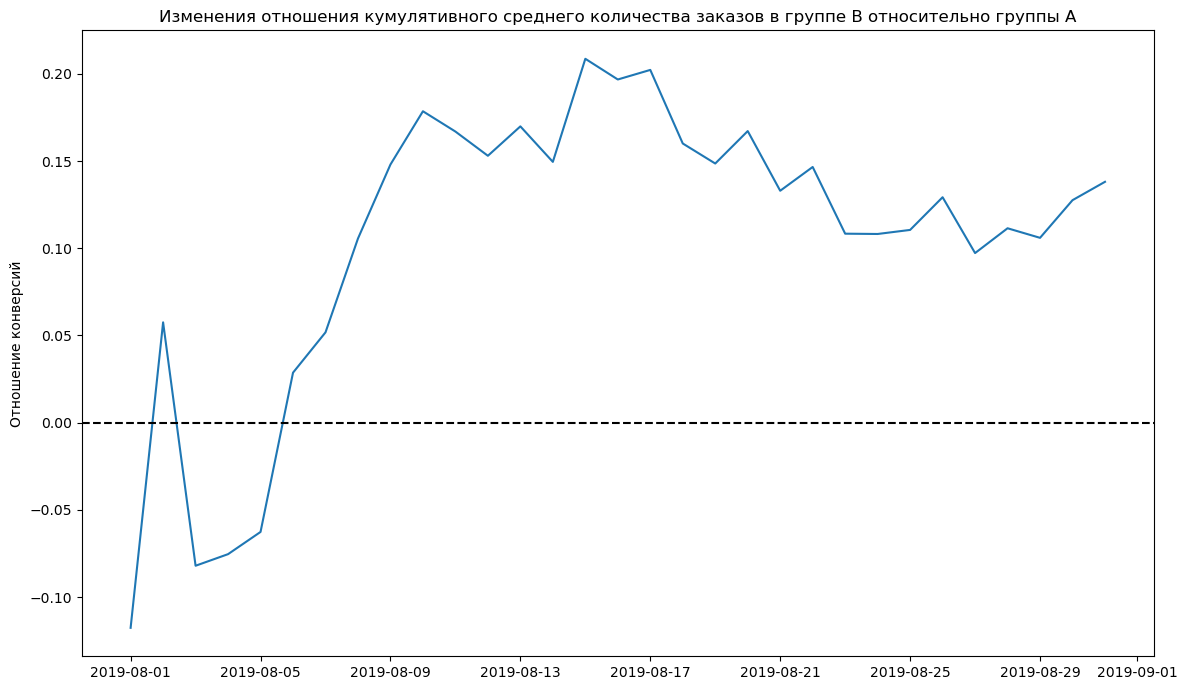

In [21]:
merged_cumulative_data = (
    cumulative_data_A[['date','orders','buyers','revenue','visitors','conversion']]
    .merge(cumulative_data_B[['date','orders','buyers','revenue','visitors','conversion']], left_on='date', right_on='date', suffixes=['A','B'])
)

plt.figure(figsize=(12,7))
plt.plot(merged_cumulative_data['date'], merged_cumulative_data['conversionB'] / merged_cumulative_data['conversionA'] - 1);
plt.axhline(y=0, color='black', linestyle='--') 

plt.ylabel('Отношение конверсий')
plt.title('Изменения отношения кумулятивного среднего количества заказов в группе В относительно группы А')
plt.tight_layout()

plt.show()

- как мы уже ранее подметили, в группе В чаще совершают заказы, примерно на 10-15%

### Построим точечный график количества заказов по пользователям

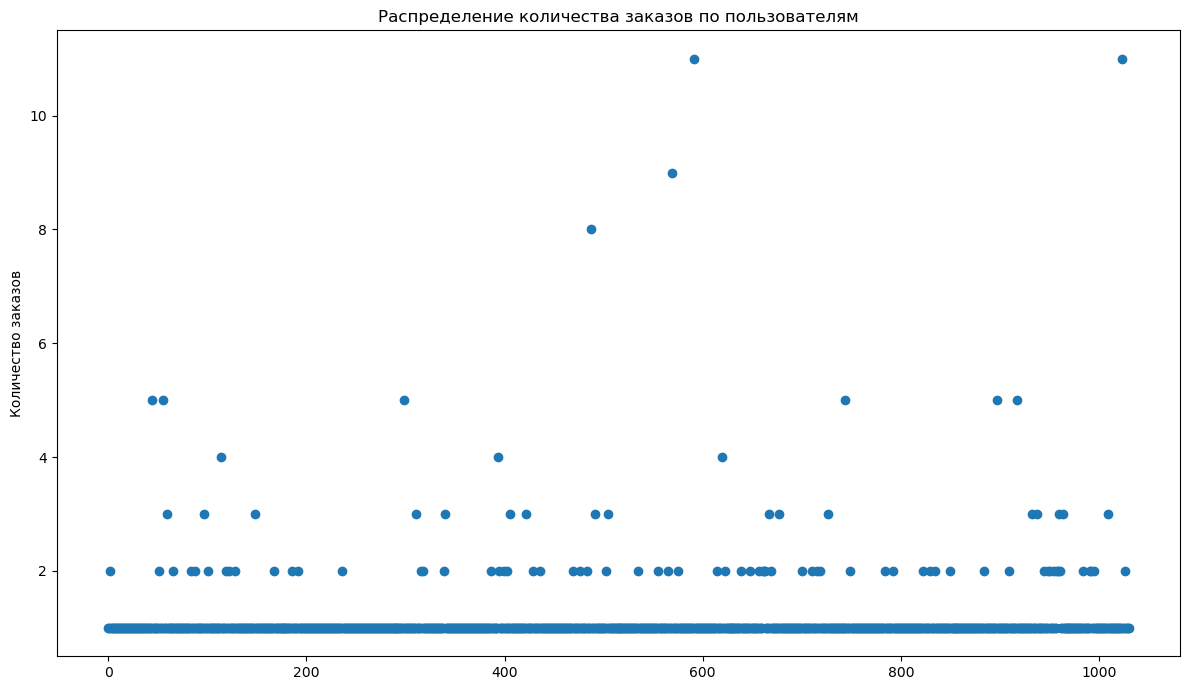

In [22]:
orders_by_user = orders.groupby('visitorId').agg({'transactionId':'nunique'})

x_values = pd.Series(range(0,len(orders_by_user)))

plt.figure(figsize=(12,7))
plt.scatter(x_values, orders_by_user['transactionId']) 

plt.ylabel('Количество заказов')
plt.title('Распределение количества заказов по пользователям')
plt.tight_layout()

plt.show()

- видим, что большая часть клиентов совершает 1-2 заказа, давайте посмотрим поточнее:

In [23]:

print('Количество заказов на пользователя, которые составляют 90%-95%-99% от выборки:', np.percentile(orders_by_user['transactionId'], [90, 95, 99]))

Количество заказов на пользователя, которые составляют 90%-95%-99% от выборки: [1. 2. 4.]


- Разумно выбрать 4 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней. Таким образом, мы потеряем около 1% данных.


### Построим точечный график стоимостей заказов


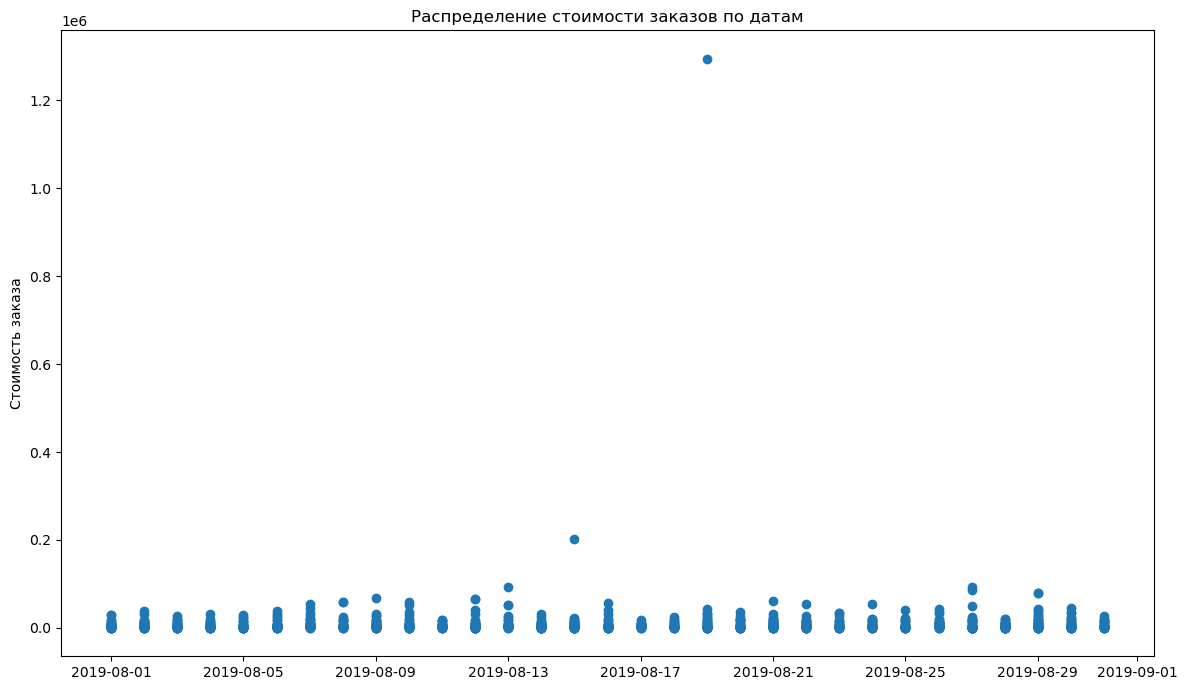

In [24]:
plt.figure(figsize=(12,7))

plt.scatter(orders['date'], orders['revenue'])

plt.title('Распределение стоимости заказов по датам')
plt.ylabel('Стоимость заказа')
plt.tight_layout()
plt.show;

- Судя по графику, основная масса заказов не превышает 50000 р. Давайте посмотрим более точно с помощью перцентилей:

In [25]:
print('Суммы заказов по дням, которые составляют 90%-95%-99% от выборки:', np.percentile(orders['revenue'], [90, 95, 99]))

Суммы заказов по дням, которые составляют 90%-95%-99% от выборки: [18168.  28000.  58233.2]


- Судя по анализу диаграммы рассеивания и перцентилей, разумно будет удалить заказы суммой выше 28000 р., которые являются выбросами и составляют менее 5% от выборки

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Сформулируем гипотезы.

Нулевая: ***различий в среднем количестве заказов между группами нет.***

Альтернативная: ***различия в среднем между группами есть.***



In [26]:

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [27]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

Соберем айди посетителей и количество их заказов по группам А и В


In [28]:
print(ordersByUsersA.shape)
print(ordersByUsersB.shape)

(503, 2)
(586, 2)


Дополним список посетителями, которые ничего не заказали (0) - нужно для корректного сравнения с помошью теста Матт-Уиттни.

In [29]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [30]:
print(" p-значение: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print(" Отношение среднего чека группы В к группе А: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

 p-значение: 0.017
 Отношение среднего чека группы В к группе А: 0.138


- Вывод: По «сырым» данным различия в среднем числе заказов групп A и B ***есть***. 
p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, мы отвергаем. Относительный выигрыш группы B равен 13.8% — второе число в выводе.

### Альтернативный расчет. Среднее количество заказов на посетителя = отношение суммы заказов из файла `orders` к количеству посетителей из файла `visitors`

In [31]:
# отбираем заказы для каждой из групп и считаем их количество
alt_orders_A = orders.query('group == "A"').groupby('date').agg({'transactionId':'nunique'}).reset_index()
alt_orders_B = orders.query('group == "B"').groupby('date').agg({'transactionId':'nunique'}).reset_index()

# считаем среднее количество заказов на посетителя в день для каждой из групп 
alt_orders_A['avg'] = (
    alt_orders_A['transactionId'] /
   visitors.loc[visitors['group'] == 'A'].reset_index(drop=True)['visitors']
                      )
alt_orders_B['avg'] = (
    alt_orders_B['transactionId'] /
   visitors.loc[visitors['group'] == 'B'].reset_index(drop=True)['visitors']
                      )

print(alt_orders_A.head())
print(alt_orders_B.head())


        date  transactionId       avg
0 2019-08-01             24  0.033380
1 2019-08-02             20  0.032310
2 2019-08-03             24  0.047337
3 2019-08-04             16  0.022315
4 2019-08-05             25  0.033069
        date  transactionId       avg
0 2019-08-01             21  0.029453
1 2019-08-02             24  0.041308
2 2019-08-03             16  0.031434
3 2019-08-04             17  0.022078
4 2019-08-05             23  0.032532


In [32]:
# Проверка нормальности распределения
def check_normality(data):
    # Тест Шапиро-Уилка
    stat, p = stats.shapiro(data)
    print("Тест Шапиро-Уилка:")
    print("Статистика теста:", stat)
    print("p-значение:", p)
    if p < 0.05:
        print("Распределение не является нормальным (p < 0.05)")
    else:
        print("Распределение является нормальным (p >= 0.05)")

# Проверка однородности дисперсии
def check_homogeneity(data1, data2):
    # Тест Левена
    stat, p = stats.levene(data1, data2)
    print("\nТест Левена:")
    print("Статистика теста:", stat)
    print("p-значение:", p)
    if p < 0.05:
        print("Дисперсии не однородны (p < 0.05)")
    else:
        print("Дисперсии однородны (p >= 0.05)")

avg_A = alt_orders_A['avg']
avg_B = alt_orders_B['avg']

# Проверка нормальности распределения для обеих групп
print("Проверка нормальности распределения для группы A:")
check_normality(avg_A)
print("\nПроверка нормальности распределения для группы B:")
check_normality(avg_B)

# Проверка однородности дисперсии
print("\nПроверка однородности дисперсии:")
check_homogeneity(avg_A, avg_B)


Проверка нормальности распределения для группы A:
Тест Шапиро-Уилка:
Статистика теста: 0.9523903727531433
p-значение: 0.18165424466133118
Распределение является нормальным (p >= 0.05)

Проверка нормальности распределения для группы B:
Тест Шапиро-Уилка:
Статистика теста: 0.981939435005188
p-значение: 0.8641687035560608
Распределение является нормальным (p >= 0.05)

Проверка однородности дисперсии:

Тест Левена:
Статистика теста: 0.2982388074291669
p-значение: 0.5870136104539402
Дисперсии однородны (p >= 0.05)


In [33]:
# Применение t-теста
t_statistic, p_value = stats.ttest_ind(alt_orders_A['avg'], alt_orders_B['avg'], equal_var=True)

# Вывод результатов
print("T-статистика:", t_statistic)
print("p-значение:", p_value)

print("Отношение среднего значения количества заказов по группе В к группе А: {0:.3f}".format(alt_orders_B['avg'].mean() / alt_orders_A['avg'].mean() - 1))

T-статистика: -1.710743059515579
p-значение: 0.0922947738393625
Отношение среднего значения количества заказов по группе В к группе А: 0.150


### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Нулевая гипотеза: ***различий в среднем чеке между группами нет.***

Альтернативная гипотеза: ***различия в среднем чеке между группами есть.*** 

In [34]:
print('значение p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Отношение среднего чека группы В к группе А: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

значение p-value: 0.729
Отношение среднего чека группы В к группе А: 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Любопыно, что при этом средний чек группы B на 26% выше среднего чека группы A - это влияние одиночного дорогого заказа от 19 августа- 

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Найденные ранее 95-й и 99-й перцентили средних чеков равны ***28000 и 58233 рублям.*** А 95-й и 99-й перцентили количества заказов на одного пользователя равны ***2 и 4*** заказа на пользователя.

Примем за аномальных пользователей тех, кто совершил от **4х** заказов или совершил заказ дороже **28 000 рублей**. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами.

In [35]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
dtype: int64
59


Всего **59** аномальных пользователей (совершивших более 4х заказов или потратившие более 28000 р.)

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.

In [36]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [37]:
print(' p-значение: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Отношение среднего значения количества заказов по группе В к группе А: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

 p-значение: 0.018
Отношение среднего значения количества заказов по группе В к группе А: 0.145


Результат, который был в тесте "сырых" данных:

 p-значение: **0.017**
 Отношение среднего количества заказов группы В к группе А: **0.138**
 
 Результаты по среднему количеству заказов практически не изменились и вывод такой же: у нас **есть основания отвергнуть нулевую гипотезу** о том, что средние значения количества заказов в группах равны. В группе В заказов больше на 14,5%.

Посмотрим, произошло ли что-нибудь с результатами по среднему чеку?

In [38]:
print(
    ' p-значение: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Отношение среднего чека по группе В к группе А: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

 p-значение: 0.961
Отношение среднего чека по группе В к группе А: -0.014


В тесте по неочищенным данным результаты были такие:

значение p-value: **0.729**
Отношение среднего чека группы В к группе А: **0.259**

P-value изменился, но все равно находися выше уровня статистичской значимости, следовательно нулевую гипотезу мы не отвергаем.
Любопытно, что отношение среднего чека в очищенных данных между группами - около 1%, они почти не отличаются. 

Какие выводы по тесту можем сделать?

1. Есть статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий - нулевую гипотезу отвергаем. ***Средние количества заказов в группах А и В не равны.***
2. Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий - нулевую гипотезу не можем отвергнуть. ***Средние чеки в группах А и В равны.***
3. Учитывая результаты теста выше и графики конверсии в группах мы можем сделать выводы, что показатели группы В лучше, чем группы А (есть статистически значимое различие в количестве заказов, конверсия в покупателя выше у В, кумулятивное количество заказов выше у В), следовательно, тест можно остановить и ***признать группу В победителем.***

В качестве рекомендации к отделу маркетинга можем предложить поработать надо увеличением среднего чека в группе В, что вместе с лучшей конверсией даст нам желаемое увеличение выручки: например - скидки на повторную покупку, предложения по аксессуарам и дополнениям к основному товару в заказе и т.п. 